In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
df = pd.read_csv('heart.csv')
df.head(4)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0


In [76]:
# Clean column names (remove hidden spaces, tabs, newlines)
df.columns = df.columns.str.strip()

In [77]:
#.. Here we convert num (which currenlty shows the severnity of heart disease from 1 to 4 ) to target . if target == 0 no heart disease
  # if target == 1 heart disease

In [78]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [79]:
df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)
df.drop('num', axis=1, inplace=True)
df.drop(columns=['id'], inplace=True)
df.drop(columns=['dataset'], inplace=True)
df.head(4)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,1
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   cp        920 non-null    object 
 3   trestbps  861 non-null    float64
 4   chol      890 non-null    float64
 5   fbs       830 non-null    object 
 6   restecg   918 non-null    object 
 7   thalch    865 non-null    float64
 8   exang     865 non-null    object 
 9   oldpeak   858 non-null    float64
 10  slope     611 non-null    object 
 11  ca        309 non-null    float64
 12  thal      434 non-null    object 
 13  target    920 non-null    int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 100.8+ KB


In [81]:
df.isnull().sum()

age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
target        0
dtype: int64

In [82]:
df.loc[:, 'trestbps'] = df['trestbps'].fillna(df['trestbps'].median())
df.loc[:, 'chol'] = df['chol'].fillna(df['chol'].median())
df.loc[:, 'thalch'] = df['thalch'].fillna(df['thalch'].median())

df.loc[:, 'fbs'] = df['fbs'].fillna(df['fbs'].mode()[0])
df.loc[:, 'restecg'] = df['restecg'].fillna(df['restecg'].mode()[0])
df.loc[:, 'exang'] = df['exang'].fillna(df['exang'].mode()[0])
df.loc[:, 'slope'] = df['slope'].fillna(df['slope'].mode()[0])
df.loc[:, 'ca'] = df['ca'].fillna(df['ca'].mode()[0])
df.loc[:, 'thal'] = df['thal'].fillna(df['thal'].mode()[0])
df.loc[:, 'oldpeak'] = df['oldpeak'].fillna(df['oldpeak'].median())

df.isnull().sum()


C:\Users\Adarsh Singh\AppData\Local\Temp\ipykernel_27896\3219036819.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[:, 'fbs'] = df['fbs'].fillna(df['fbs'].mode()[0])
C:\Users\Adarsh Singh\AppData\Local\Temp\ipykernel_27896\3219036819.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[:, 'exang'] = df['exang'].fillna(df['exang'].mode()[0])


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Data Analysis part

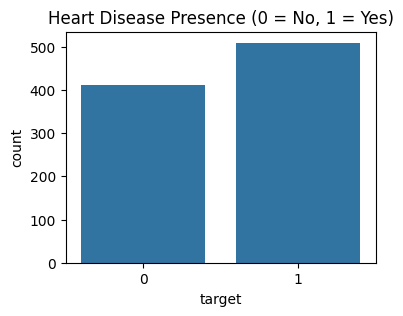

In [70]:
plt.figure(figsize = (4,3))
sns.countplot(x = 'target' , data = df)
plt.title("Heart Disease Presence (0 = No, 1 = Yes)")
plt.show()

In [83]:
from sklearn.preprocessing import LabelEncoder

# Apply label encoding on object columns
label = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = label.fit_transform(df[col])


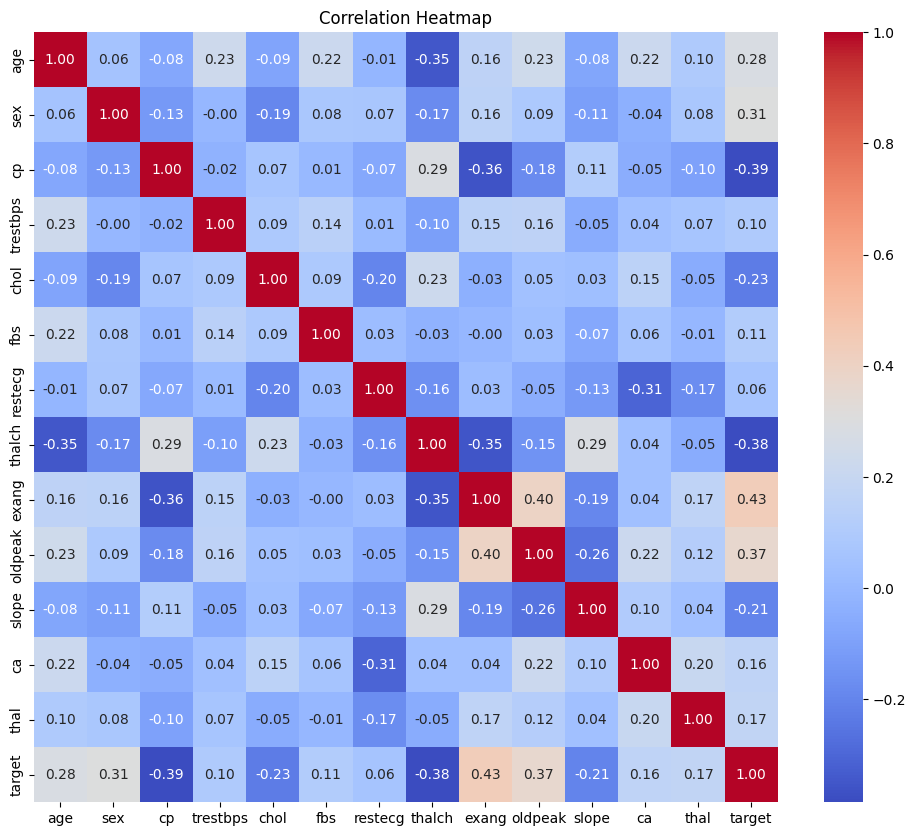

In [84]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

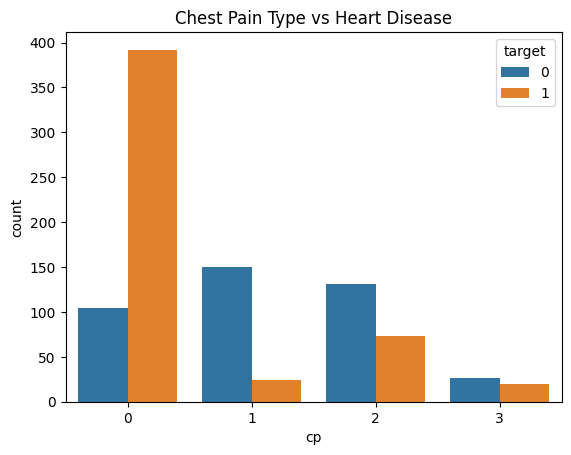

In [85]:
sns.countplot(x='cp', hue='target', data=df)
plt.title("Chest Pain Type vs Heart Disease")
plt.show()


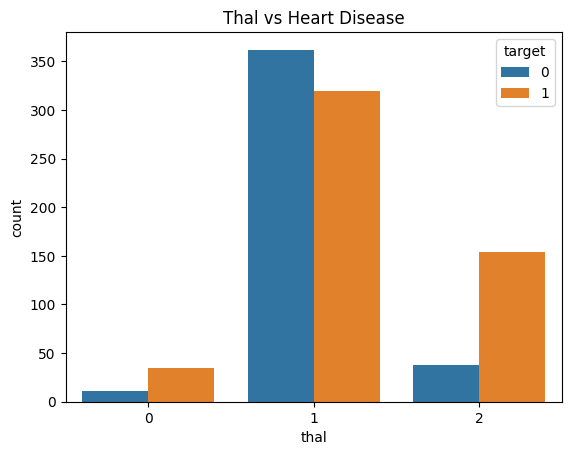

In [86]:
sns.countplot(x='thal', hue='target', data=df)
plt.title("Thal vs Heart Disease")
plt.show()


Data Preprocessing

In [91]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['thal'] = le.fit_transform(df['thal'])

In [92]:
for col in ['cp', 'restecg', 'slope', 'thal', 'ca']:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])


In [93]:
x = df.drop('target' , axis = 1)
y = df['target']

In [95]:
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)


In [100]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


C:\Users\Adarsh Singh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Store models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier()
}

# Train and test each
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    print(f"📊 {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("-" * 50)


📊 Logistic Regression
Accuracy: 0.4076086956521739
Classification Report:
               precision    recall  f1-score   support

           0       0.41      1.00      0.58        75
           1       0.00      0.00      0.00       109

    accuracy                           0.41       184
   macro avg       0.20      0.50      0.29       184
weighted avg       0.17      0.41      0.24       184

Confusion Matrix:
 [[ 75   0]
 [109   0]]
--------------------------------------------------


C:\Users\Adarsh Singh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Adarsh Singh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Adarsh Singh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

📊 Random Forest
Accuracy: 0.6304347826086957
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.76      0.63        75
           1       0.77      0.54      0.63       109

    accuracy                           0.63       184
   macro avg       0.65      0.65      0.63       184
weighted avg       0.67      0.63      0.63       184

Confusion Matrix:
 [[57 18]
 [50 59]]
--------------------------------------------------
📊 KNN
Accuracy: 0.7119565217391305
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.36      0.50        75
           1       0.68      0.95      0.80       109

    accuracy                           0.71       184
   macro avg       0.76      0.66      0.65       184
weighted avg       0.75      0.71      0.68       184

Confusion Matrix:
 [[ 27  48]
 [  5 104]]
--------------------------------------------------


In [104]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth = 5 , random_state = 42)
rf.fit(x_train , y_train)
y_pred_rf = rf.predict(x_test)

from sklearn.metrics import accuracy_score
print("RF Accuracy:", accuracy_score(y_test, y_pred_rf))  #  Bad Accuracy

RF Accuracy: 0.5271739130434783


In [106]:
from sklearn.model_selection import cross_val_score

for k in range (1 , 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, x_train , y_train , cv = 5)
    print(f"K={k}, Avg Accuracy: {score.mean():.4f}")   #.. we will use k = 19 for our knn model 


K=1, Avg Accuracy: 0.7554
K=2, Avg Accuracy: 0.7242
K=3, Avg Accuracy: 0.7867
K=4, Avg Accuracy: 0.7595
K=5, Avg Accuracy: 0.7989
K=6, Avg Accuracy: 0.7867
K=7, Avg Accuracy: 0.8044
K=8, Avg Accuracy: 0.7962
K=9, Avg Accuracy: 0.8125
K=10, Avg Accuracy: 0.8044
K=11, Avg Accuracy: 0.8125
K=12, Avg Accuracy: 0.8098
K=13, Avg Accuracy: 0.8193
K=14, Avg Accuracy: 0.8166
K=15, Avg Accuracy: 0.8152
K=16, Avg Accuracy: 0.8180
K=17, Avg Accuracy: 0.8193
K=18, Avg Accuracy: 0.8207
K=19, Avg Accuracy: 0.8220
K=20, Avg Accuracy: 0.8193


In [110]:
from sklearn.neighbors import KNeighborsClassifier

# KNN with K=19
knn_model = KNeighborsClassifier(n_neighbors=19)
knn_model.fit(x_train, y_train)

# Save this model
import joblib
joblib.dump(knn_model, 'heart_knn_model.pkl')
joblib.dump(scaler, 'scaler.pkl')  # Save the same scaler too


['scaler.pkl']

In [ ]:
# App creation

In [2]:
import streamlit as st
import joblib
import numpy as np

# Load model + scaler
model = joblib.load("heart_knn_model.pkl")
scaler = joblib.load("scaler.pkl")

st.title("❤️ Heart Disease Prediction App")

# User inputs
age = st.number_input("Age", 18, 100, 50)
sex = st.selectbox("Sex", [0, 1])  # 0 = female, 1 = male
cp = st.selectbox("Chest Pain Type", [0, 1, 2, 3])
trestbps = st.number_input("Resting Blood Pressure", 80, 200, 120)
chol = st.number_input("Cholesterol", 100, 400, 200)

# Add more inputs as per your dataset...

if st.button("Predict"):
    features = np.array([[age, sex, cp, trestbps, chol]])
    features_scaled = scaler.transform(features)
    prediction = model.predict(features_scaled)

    if prediction[0] == 1:
        st.error("⚠️ High chance of Heart Disease")
    else:
        st.success("✅ No Heart Disease detected")


2025-09-02 23:54:44.686 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-02 23:54:44.688 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-02 23:54:44.689 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-02 23:54:44.690 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-02 23:54:44.693 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-02 23:54:44.696 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-02 23:54:44.698 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-02 23:54:44.700 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [3]:
streamlit run app.py


SyntaxError: invalid syntax (507122745.py, line 1)